# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- **Nama:** Ahmad Kholish Fauzan Shobiry
- **Email:** shobiry2000@gmail.com
- **ID Dicoding:** Ahmad Kholish Fauzan Shobiry

## Menentukan Pertanyaan Bisnis

- Sebutkan 10 jumlah pelanggan E-Commerce terbanyak berdasarkan daerah asalnya?
- Bagaimana tingkat kepuasan pelanggan E-Commerce berdasarkan 10 nilai rating tertinggi pada pembelian tiap jenis barang yang dilakukan?
- Metode Pembayaran apa yang lebih banyak digunakan oleh para pelanggan E-Commerce pada saat memesan barang?

## Import Semua Packages/Library yang Digunakan

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub

## Data Wrangling

### Gathering Data

In [101]:
# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)
!ls /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2

Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2
olist_customers_dataset.csv	  olist_orders_dataset.csv
olist_geolocation_dataset.csv	  olist_products_dataset.csv
olist_order_items_dataset.csv	  olist_sellers_dataset.csv
olist_order_payments_dataset.csv  product_category_name_translation.csv
olist_order_reviews_dataset.csv


In [102]:
# Memuat Tabel Customers dengan mengakses dataset olist_customers_dataset.csv dan Menampilkan 5 baris pertama isi dataset
customers_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [103]:
# Memuat Tabel Review/Rating dengan mengakses dataset olist_order_reviews_dataset.csv dan Menampilkan 5 baris pertama isi dataset
reviews_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_order_reviews_dataset.csv')
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [104]:
# Memuat Tabel Pemesanan Barang dengan mengakses dataset olist_order_items_dataset.csv dan Menampilkan 5 baris pertama isi dataset
order_items_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [105]:
# Memuat Tabel berisi nama-nama spesifik Produk dengan mengetahui ID tiap nama jenis produk dengan mengakses dataset olist_products_dataset.csv
# dan Menampilkan 5 baris pertama isi dataset
product_name_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_products_dataset.csv')
product_name_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [106]:
# Memuat Tabel Nama Produk (dalam bahasa Inggris), agar nanttinya dapat mengetahui nama jenis produk secara jelas
# Dilakukan dengan mengakses product_category_name_translation.csv dan Menampilkan 5 baris pertama isi dataset
translation_product_name_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/product_category_name_translation.csv')
translation_product_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [107]:
# Memuat Tabel Pembayaran Pesanan dengan mengakses dataset olist_order_payments_dataset.csv dan Menampilkan 5 baris pertama isi dataset
# Hal ini sangat penting dilakukan agar nanti dapat diketahui metode pembayaran yang digunakan oleh pelanggan, sehingga dapat diketahui metode pembayaran terbanyak digunakan
payments_df = pd.read_csv('/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2/olist_order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Untuk menjawab pertanyaan bisnis, tabel pada Dataframe Customer memiliki beberapa kolom yang relevan dengan tujuan analisis, antara lain: customer_id, customer_city, dan customer_state. Tiga kolom ini akan digunakan untuk menghitung jumlah pelanggan (customer_id) yang akan dikelompokkan berdasarkan asalnya (customer_city). Hal ini dilakukan untuk mengetahui persebaran kota dengan pelanggan E-Commerce terbanyak.

- Tabel pada Dataframe Review menyediakan beberapa kolom data relevan yang akan digunakan untuk mengidentifikasi nilai rating (review_score) dengan keseluruhan  order yang ada (order_id).

- Selain itu, Dataframe Barang Pesanan (order_items_df), memiliki kolom order_id yang digunakan untuk mengidentifikasi product_id agar nanti dapat diketahui nama kategori produknya.

- Dataframe Barang Pesanan (order_items_df), dan Dataframe Nama Produk (product_name_df) memiliki kolom yang sama yakni product_id. Kolom ini sangat penting untuk membantu mengetahui Kategori Nama Produk (name_category_product) berdasarkan kode product_id.

- Dataframe Nama Produk (product_name_df) dan Dataframe Arti Nama Produk (translation_product_name_df) memiliki product_category_name. Hal ini sangat penting mengetahui bahwa pada awalnya kategori nama produk tidak menggunakan bahasa Inggris, sehingga butuh Dataframe translation_product_name_df untuk mengetahui nama kategori produk-produk tersebut dalam Bahasa Inggris agar hasil analisis akhir dapat lebih dipahami.

- Tabel pada Dataframe payments_df memiliki kolom order_id dan payment_type yang sangat dibutuhkan nantinya untuk mengetahui kecenderungan metode pembayaran yang digunakan pelanggan.

### Assessing Data

In [108]:
# Melakukan pengecekan tipe data tiap kolom dalam tabel Customer
customers_df.info()
# Melakukan pengecekan apabila terdapat missing value dalam tabel
customers_df.isna().sum()
# Melakukan pengecekan apabila terdapat duplikasi data pada tabel
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Jumlah duplikasi:  0


In [109]:
# Melakukan pengecekan tipe data tiap kolom dalam tabel
reviews_df.info()
# Melakukan pengecekan apabila terdapat missing value dalam tabel
reviews_df.isna().sum()
# Melakukan pengecekan apabila terdapat duplikasi data pada tabel
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0


In [110]:
# Melakukan pengecekan tipe data tiap kolom dalam tabel
order_items_df.info()
# Melakukan pengecekan apabila terdapat missing value dalam tabel
order_items_df.isna().sum()
# Melakukan pengecekan apabila terdapat duplikasi data pada tabel
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Jumlah duplikasi:  0


In [111]:
# Melakukan pengecekan tipe data tiap kolom dalam tabel
product_name_df.info()
# Melakukan pengecekan apabila terdapat missing value dalam tabel
print("Jumlah Missing Value:\n", product_name_df.isna().sum())
# Melakukan pengecekan apabila terdapat duplikasi data pada tabel
print("Jumlah duplikasi: ", product_name_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Jumlah Missing Value:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g    

In [112]:
# Mengecek tipe data pada kolom-kolom tabel
translation_product_name_df.info()
# Melakukan pengecekan apabila terdapat missing value dalam tabel
translation_product_name_df.isna().sum()
# Melakukan pengecekan apabila terdapat duplikasi data pada tabel
print("Jumlah duplikasi: ", translation_product_name_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
Jumlah duplikasi:  0


In [113]:
# Melakukan pengecekan tipe data tiap kolom dalam tabel
payments_df.info()
# Melakukan pengecekan apabila terdapat missing value dalam tabel
payments_df.isna().sum()
# Melakukan pengecekan apabila terdapat duplikasi data pada tabel
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Jumlah duplikasi:  0


**Insight:**
- Berdasarkan hasil assessing data, Tabel Dataframe Customers tidak menunjukkan adanya Missing Value, Data Duplikasi, dan Tipe data yang tidak bersesuaian dengan proyek analisis bisnis.

- Tabel Dataframe Review (reviews_df) memiliki beberapa missing value pada kolom review_comment_title dan review_comment_message. Namun, Missing Value ini akan diabaikan sebab tidak relevan dengan analisis. Analisis yang akan dilakukan membutuhkan data kolom review_score dan order_id sehingga didapatkan nilai rating nantinya yang akan disajikan dengan nama barangnya. Data ini juga tidak memiliki duplikasi data

- Tabel Dataframe Pesanan Barang (order_items_df) tidak memliki Missing Value dan Duplikasi Data.

- Tabel Dataframe Nama Produk (product_name_df) tidak memiliki Duplikasi Data, namun memiliki 610 Missing Values pada masing-masing kolom product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty. Terdapat 2 Missing Values pada masing-masing kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm.

- Tabel Dataframe Arti Nama Produk (translation_product_name_df) dan Dataframe Pembayaran (payments_df) tidak memiliki duplikasi data dan Missing Value.

- Berdasarkan temuan utama di atas, dapat disumpulkan bahwa perlu dilakukan Data Cleaning pada Tabel Dataframe Nama Produk (product_name_df). Seperti yang disebutkan sebelumnya, bahwa Tabel ini memiliki kolom yang sangat penting dan hanya relevan untuk analisis Bisnis yakni kolom product_category_name agar nanti dapat mengethauo Nama Kategori Produk. Maka, Missing Value yang dibersihkan pada dataframe ini adalah khusus pada penelisikan kolom product_category_name.

### Cleaning Data

In [114]:
# Melakukan Filtering untuk menampilkan isi tabel yang memiliki nilai NaN pada 4 kolom.
# Hal ini saya lakukan sebab ke 4 kolom tersebut memiliki jumlah Missing Value yang sama.
missing_values_df = product_name_df[
    product_name_df[['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']].isna().any(axis=1)
]

missing_values_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insight:**
- Setelah mengecek Missing Value pada 4 kolom tersebut, ditemukan bahwa semua Missing Value yang ada hanya terdapat pada 2 baris data.

- Data dengan product_id 09ff539a621711667c43eba6a3bd8466 telah memiliki nilai product_category_name.

- Sedangkan Data dengan product_id 5eb564652db742ff8f28759cd8d2652a tidak memiliki nilai product_category_name.

- Maka, Data dengan product_id 09ff539a621711667c43eba6a3bd8466 tidak akan dihapus sebab telah ada Nama Kategori Produk nya.

In [115]:
# Melakukan Filtering untuk menampilkan isi dari tabel product_name_df yang memiliki nilai NaN saja.
# Hal ini dilakukan untuk mengetahui 610 Missing Values yang lain
product_name_df[product_name_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


**Insight:**
- Ditemukan bahwa 610 Missing Values di atas tidak memiliki nilai product_category_name yang dibutuhkan untuk keperluan analisis.
- Maka berdasarkan pengamatan saya, disini saya mencari pola atau kemiripan serupa diantara barang yang ada, maka saya akan melakukan imputasi yang nantinya menggunakan kolom product_length_cm, product_height_cm, dan product_width_cm.

- Nantinya akan menghasilkan nilai volume barang, dan barang yang tidak memiliki nilai product_category_name akan diketahui volume barangnya, dan akan diklasifikaskan nilai nya berdasarkan kemiripan volume barangnya dengan barang-barang lain yang telah memiliki nilai product_category_name.

- Sebelum melakukan imputasi, saya akan membuang satu baris data dengan product_id = 5eb564652db742ff8f28759cd8d2652a. Hal ini saya lakukan sebab baris data ini tidak memiliki nilai data yang jelas, sehingga juga tidak dapat diimputasikan.

In [116]:
# Melakukan Drop Data yang memiliki product_id = 5eb564652db742ff8f28759cd8d2652a
product_name_df = product_name_df[product_name_df['product_id'] != '5eb564652db742ff8f28759cd8d2652a']

In [117]:
# Mengelompokkan dan melakukan cek pada Missing Value berdasarkan "product_category_name"
missing_category_df = product_name_df[product_name_df['product_category_name'].isna()]
print("Jumlah Missing Value:\n", missing_category_df.isna().sum())

Jumlah Missing Value:
 product_id                      0
product_category_name         609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64


In [118]:
# Melakukan imputasi pada 609 data product_category_name berdasarkan penghitungan Volume

# Menghitung volume untuk tiap 609 baris ini
# Buat salinan untuk menghindari warning dan agar perubahan hanya berlaku pada salinan, bukan data asli.
missing_category_df = missing_category_df.copy()
missing_category_df.loc[:, 'volume'] = (missing_category_df['product_length_cm'] * # Menghitung volume produk dengan rumus Volume = Length x Height x Width
                                        missing_category_df['product_height_cm'] * # Hasilnya Kolom baru "volume" ditambahkan pada missing_category_df.
                                        missing_category_df['product_width_cm'])   # Penting karena volume digunakan untuk mencocokkan produk dengan kategori yang mirip.

# Membuat dataset baru (known_category_df) yang hanya berisi produk dengan kategori yang sudah diketahui.
known_category_df = product_name_df[product_name_df['product_category_name'].notna()].copy()
# Sama seperti sebelumnya, menghitung volume untuk produk yang sudah memiliki kategori.
known_category_df.loc[:, 'volume'] = (known_category_df['product_length_cm'] *
                                      known_category_df['product_height_cm'] *
                                      known_category_df['product_width_cm'])

# Mengelompokkan data berdasarkan kategori produk yang mengacu pada median volume untuk setiap kategori. Lalu, diurutkan hasilnya berdasarkan volume.
category_mapping = known_category_df.groupby('product_category_name')['volume'].median().sort_values()

# Mencari kategori yang memiliki volume median terdekat dengan produk yang hilang kategorinya.
# Sehingga setiap produk akan mendapatkan kategori yang paling mirip berdasarkan ukuran volumenya.
def assign_category(volume):
    return category_mapping.iloc[(category_mapping - volume).abs().argsort()[:1]].index[0]

# Menggunakan fungsi assign_category() untuk mengisi kategori yang hilang berdasarkan volume terdekat pada missing_category_df
missing_category_df.loc[:, 'product_category_name'] = missing_category_df['volume'].apply(assign_category)

In [119]:
# Menggabungkan dataset utama (product_name_df) dengan dataset hasil imputasi (missing_category_df), hanya mengambil kolom product_id dan product_category_name.
# DataFrame baru (merged_product_df) memiliki dua kolom kategori:
# 1.product_category_name → Data asli (masih ada NaN),
# 2.product_category_name_imputed → Data hasil imputasi (tidak ada NaN).

merged_product_df = product_name_df.merge(
    missing_category_df[['product_id', 'product_category_name']],
    on='product_id',
    how='left',
    suffixes=('', '_imputed')
)

# Jika nilai product_category_name awalnya NaN, maka akan diganti dengan nilai dari product_category_name_imputed (hasil imputasi).
merged_product_df['product_category_name'] = merged_product_df['product_category_name'].fillna(
    merged_product_df['product_category_name_imputed']
)

# Menghapus Kolom product_category_name_imputed yang sudah tidak diperlukan karena semua nilai yang hilang telah terisi di kolom utama (product_category_name).
merged_product_df.drop(columns=['product_category_name_imputed'], inplace=True)

# Cek jumlah missing value setelah update
print("Jumlah Missing Value setelah update:", merged_product_df['product_category_name'].isna().sum())

Jumlah Missing Value setelah update: 0


Penjelasan Kode di atas,
1. Menghitung Volume Produk
<br>Membuat sebuah salinan dari data dengan kategori yang hilang (missing_category_df) dibuat untuk menghindari perubahan langsung pada data asli. Kolom baru volume dihitung menggunakan rumus:
Volume = Length × Height × Width

2. Menyiapkan Data Produk yang Sudah Memiliki Kategori
<br>Data produk yang sudah memiliki kategori (known_category_df) difilter dan dibuat salinannya. Volume untuk produk ini juga dihitung menggunakan rumus yang sama.

3. Menentukan Volume Median untuk Setiap Kategori
<br>Data yang memiliki kategori dikelompokkan berdasarkan product_category_name.
Median volume untuk setiap kategori dihitung dan diurutkan berdasarkan besarannya.

4. Mencari Kategori Terdekat Berdasarkan Volume
<br>Fungsi assign_category() dibuat untuk mencari kategori dengan median volume terdekat dibandingkan dengan volume dari produk yang kategorinya hilang.
Setiap produk dengan kategori yang hilang diberikan kategori yang paling sesuai berdasarkan nilai volume.

5. Menggabungkan Hasil Imputasi ke Data Utama
<br>Dataset hasil imputasi (missing_category_df) digabungkan kembali dengan dataset utama (product_name_df) berdasarkan product_id.
Jika kategori asli masih NaN, nilai tersebut diganti dengan hasil imputasi.
Setelah itu, kolom sementara (product_category_name_imputed) dihapus karena semua nilai telah diperbarui dalam kolom utama.

6. Cek Hasil Imputasi
<br>Setelah proses selesai, dicek kembali apakah masih ada nilai yang hilang di kolom product_category_name.

**Insight:**
- Dengan menggunakan volume sebagai acuan, kategori produk yang hilang dapat diprediksi secara lebih akurat dibandingkan hanya menghapus atau mengisi dengan nilai default.
- Pendekatan ini efektif dalam menangani data yang hilang dalam jumlah besar (609 produk) tanpa mengurangi informasi penting dalam dataset.
- Hasil akhirnya adalah tidak ada lagi missing value pada product_category_name, yang berarti semua produk memiliki kategori yang lebih masuk akal dibandingkan metode imputasi lain seperti pengisian acak atau menggunakan modus.

## Exploratory Data Analysis (EDA)

### Explore ...

In [120]:
# Melakukan pengecekan informasi terbaru setelah melakukan Cleaning pada Data
print(merged_product_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32950 non-null  object 
 1   product_category_name       32950 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


**Insight:**
- Dataframe merged_product_df yang mengambil data dari Dataframe product_name_df sudah tidak memiliki Missing Value lagi pada nilai kolom product_category_name. Hal ini dapat diketahui banyak data (RangeIndex) adalah 32950, begitu pula jumlah data pada kolom product_category_name. Sehingga data siap digunakan.

Untuk mulai mencari jawaban atas Analisis Bisnis, maka langkah selanjutnya adalah pengelompokan data. Pengelompokan data dilakukan untuk mencari benang merah dan kesesuaian korelasi antar data. Namun sebelum dikelompokkan, perlu diketahui terlebih dahulu statistik data.

In [121]:
# Untuk mengetahui persebaran penghitungan Statistik Review
print(reviews_df.describe())

       review_score
count  99224.000000
mean       4.086421
std        1.347579
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


**Insights**
- Rata-rata skor review adalah 4.08 dengan standar deviasi 1.35.
- Median (50%) review score adalah 5, menunjukkan bahwa mayoritas ulasan memiliki rating tinggi.
- 25% dari data memiliki skor 4 atau lebih rendah, menunjukkan masih ada cukup banyak ulasan negatif.
- Ada nilai minimum 1, yang berarti terdapat ulasan dengan rating sangat rendah.
---
Sebagian besar pelanggan memberikan review yang tinggi, tetapi masih ada sejumlah ulasan dengan skor rendah. Perlu analisis lebih lanjut untuk memahami penyebab ulasan negatif (misalnya, produk, pengiriman, atau layanan pelanggan). Namun, hal ini belum akan dianalisis lebih lanjut sebab adanya batasan analisis berdasarkan pertanyaan Bisnis.

In [122]:
# Untuk mengetahui persebaran penghitungan Statistik merged_product_df (Dataframe Hasil Imputasi)
print(merged_product_df.describe())

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.0

**Insight**
- Beberapa produk memiliki deskripsi yang sangat pendek, yang bisa mempengaruhi pengalaman pelanggan dan keputusan pembelian. Perlu dicek apakah ada pola pada kategori produk tertentu yang memiliki deskripsi pendek.
- Mayoritas produk hanya memiliki satu foto, yang bisa menjadi faktor dalam kepuasan pelanggan. Sebaiknya dilakukan analisis lebih lanjut untuk melihat hubungan antara jumlah foto dan review score.
- Terdapat outlier signifikan dalam berat dan dimensi produk, yang bisa menunjukkan data yang salah input atau kategori produk yang sangat bervariasi.

Berdasarkan hasil analisis statistik di atas, diketahui Dataframe merge_product_df yang merupakan hasil imputasi, masih memiliki outlier yang cukup signifikan terutama dalam dimensi produknya, dimana dimensi produk inilah yang merupakan buah dari proses imputasi. Maka, akan dilakukan penghapusan outlier menggunakan metode IQR (Interquartile Range), sebagai metode yang umum digunakan.

In [123]:
# Menentukan kolom numerik yang akan diproses
num_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # Kuartil pertama (25%)
    Q3 = df[column].quantile(0.75)  # Kuartil ketiga (75%)
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas

    # Filter data yang berada dalam batas normal
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers

# Terapkan IQR ke setiap kolom numerik
for col in num_cols:
    merged_product_df = remove_outliers_iqr(merged_product_df, col)

# Cek hasil setelah menghapus outlier
print(merged_product_df.describe())

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         25100.000000                25100.000000        25100.000000   
mean             48.152191                  751.990956            2.119920   
std              10.312629                  629.769565            1.678881   
min               6.000000                    4.000000            1.000000   
25%              42.000000                  334.000000            1.000000   
50%              51.000000                  578.000000            1.000000   
75%              57.000000                  937.000000            3.000000   
max              76.000000                 3992.000000           17.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      25589.000000       25589.000000       25589.000000   
mean         799.450115          25.083903          13.281293   
std          803.918402           9.424388           7.936400   
min            0.000000           7.0

In [124]:
# Cek jumlah data sebelum dan sesudah
print(f"Jumlah data sebelum: {len(product_name_df)}")
print(f"Jumlah data sesudah: {len(merged_product_df)}")
print(f"Jumlah data yang dihapus sebagai outlier: {len(product_name_df) - len(merged_product_df)}")

Jumlah data sebelum: 32950
Jumlah data sesudah: 25589
Jumlah data yang dihapus sebagai outlier: 7361


In [125]:
print(merged_product_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 25589 entries, 0 to 32949
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  25589 non-null  object 
 1   product_category_name       25589 non-null  object 
 2   product_name_lenght         25100 non-null  float64
 3   product_description_lenght  25100 non-null  float64
 4   product_photos_qty          25100 non-null  float64
 5   product_weight_g            25589 non-null  float64
 6   product_length_cm           25589 non-null  float64
 7   product_height_cm           25589 non-null  float64
 8   product_width_cm            25589 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.0+ MB
None


**Insight**
- Berdasarkan hasil dari perhitungan IQR untuk menghapus outlier yang ada, maka keseluruhan data bersih yang dapat digunakan yakni sebanyak 25.589 data. Inilah data yang akan digunakan untuk menjawab analisis Bisnis.

**Mengelompokkan Data**

Sebagai bagian tahapan dari EDA. Pengelompokan data dilakukan untuk mencari benang merah dan kesesuaian korelasi antar data untuk mencapai Analisis Bisnis. Langkah ini dilakukan untuk memastikan data terlebih dahulu sebelum divisualisasikan.

In [126]:
# Melakukan penghitungan jumlah customer berdasarkan customer_id yang didasarkan pada city dan state nya, sehingga didapatkan jumlah pelanggan.
customer_counts = customers_df.groupby(['customer_city', 'customer_state'])['customer_id'].count().reset_index()

# Melakukan perubahan nama dari customer_id menjadi customer_count untuk memudahkan pemahaman.
# Kode ini berisi jumlah costumer yang sudah dihitung berdasarkan city dan statenya
customer_counts.rename(columns={'customer_id': 'customer_count'}, inplace=True)

# Kode ini dibuat untuk menampilkan 10 kota dengan jumlah pelanggan terbanyak dari customer_count
top_ten_cities = customer_counts.sort_values(by='customer_count', ascending=False).head(10)
print(top_ten_cities)

              customer_city customer_state  customer_count
3758              sao paulo             SP           15540
3281         rio de janeiro             RJ            6882
469          belo horizonte             MG            2773
587                brasilia             DF            2131
1187               curitiba             PR            1521
739                campinas             SP            1444
3080           porto alegre             RS            1379
3375               salvador             BA            1245
1587              guarulhos             SP            1189
3574  sao bernardo do campo             SP             938


Kode di atas digunakan untuk menghitung jumlah pelanggan berdasarkan kota (customer_city) dan negara bagian (customer_state), lalu menampilkan 10 kota dengan jumlah pelanggan terbanyak.

**Insight**
- São Paulo memiliki jumlah pelanggan tertinggi, maka kota ini bisa menjadi target utama kampanye pemasaran atau pengoptimalan logistik.
- Dapat dilihat bahwa kota selain Sao Paulo memliki persebaran jumlah pelanggan yang sangat jauh, maka, daerah dengan pelanggan yang jauh lebih sedikit ini dapat menjadi potensi untuk kampanye pemasaran digital atau diskon khusus untuk menarik lebih banyak pelanggan di kota tersebut.

In [127]:
# Menghubungkan produk yang dipesan (order_items_df) dengan rating/ulasan (reviews_df) menggunakan order_id
merged_df = pd.merge(order_items_df[['order_id', 'product_id']],
                     reviews_df[['order_id', 'review_score']],
                     on='order_id',
                     how='left')

# Menambahkan kategori produk ke dalam dataset berdasarkan product_id
merged_df = pd.merge(merged_df,
                     merged_product_df[['product_id', 'product_category_name']],
                     on='product_id',
                     how='left')

# Menerjemahkan nama kategori produk ke dalam bahasa Inggris dengan mencocokkan product_category_name.
merged_df = pd.merge(merged_df,
                     translation_product_name_df,
                     on='product_category_name',
                     how='left')

# Menghitung rata-rata skor review untuk setiap kategori produk berdasarkan product_category_name_english
category_satisfaction = merged_df.groupby('product_category_name_english')['review_score'].mean().reset_index()

# Tampilkan hasil
print(category_satisfaction.nlargest(10, 'review_score'))

   product_category_name_english  review_score
38             furniture_bedroom      4.937500
46                home_comfort_2      4.636364
35                       flowers      4.500000
8         books_general_interest      4.423698
11             cds_dvds_musicals      4.421053
22       costruction_tools_tools      4.396040
53           luggage_accessories      4.364026
10               books_technical      4.353135
45             home_appliances_2      4.333333
37                    food_drink      4.316547


Kode di atas bertujuan untuk menghubungkan produk yang dipesan dengan ulasan (review) pelanggan serta menghitung rata-rata skor ulasan per kategori produk.

**Insight**

Insight dari Data Kategori Produk dengan Rating Tertinggi
1.  Kategori "Furniture Bedroom" Mendapatkan Rating Tertinggi (4.94)
2. Produk Home & Living Mendominasi
<br>"Home Comfort 2" (4.63) dan "Home Appliances 2" (4.33) juga masuk dalam daftar tertinggi.
3. Buku dan Hiburan Juga Banyak Disukai
<br>Kategori "Books General Interest" (4.42) dan "Books Technical" (4.35) menunjukkan bahwa buku memiliki ulasan yang baik.
4. "CDs, DVDs, Musicals" (4.42) juga memiliki rating tinggi, menunjukkan bahwa produk hiburan piringan fisik masih memiliki pasar.
5.Kategori Alat & Aksesori Juga Populer
<br>"Construction Tools" (4.39) dan "Luggage Accessories" (4.36) mendapatkan skor tinggi.
6. Produk Makanan & Minuman Masuk 10 Besar (4.31)

**Kesimpulan & Rekomendasi**
- Fokus pada produk Home & Living karena kategori ini mendominasi rating tinggi.
- Eksplorasi peluang di kategori buku dan hiburan, karena pelanggan memberikan rating baik.
- Pastikan kualitas produk tetap terjaga, terutama di kategori dengan rating tinggi, untuk mempertahankan kepuasan pelanggan.
- Tingkatkan strategi pemasaran pada kategori dengan skor tinggi untuk meningkatkan penjualan.



In [128]:
# Mengelompokkan data berdasarkan metode pembayaran.
# Menghitung jumlah pemesanan (order_id) dalam setiap kelompok metode pembayaran.
payment_counts = payments_df.groupby('payment_type')['order_id'].count()

# Menampilkan jumlah pesanan berdasarkan metode pembayaran
print(payment_counts)

payment_type
boleto         19784
credit_card    76795
debit_card      1529
not_defined        3
voucher         5775
Name: order_id, dtype: int64


**Insights**
1. Kartu Kredit adalah Metode Pembayaran Paling Populer (76.795 transaksi)
2. Boleto Menjadi Alternatif Populer (19.784 transaksi)
<br>Boleto (sistem pembayaran berbasis kode di Brasil) menjadi metode kedua yang paling banyak digunakan. Ini menunjukkan bahwa beberapa pelanggan masih memilih pembayaran tunai atau transfer bank.
3. Debit Card Kurang Diminati (1.529 transaksi)
4. Voucher Digunakan dalam 5.775 Transaksi
<br>Cukup banyak pelanggan yang menggunakan voucher, menunjukkan bahwa program diskon atau promo cukup diminati.
5. Kategori "Not Defined" (3 transaksi) Perlu Diperiksa
<br>Bisa jadi ada data yang salah input atau transaksi yang tidak valid.

**Kesimpulan & Rekomendasi**
1. Fokus pada kartu kredit dan boleto sebagai metode utama pembayaran dengan meningkatkan keamanan dan kemudahan transaksi.
2. Tingkatkan promosi dan program diskon berbasis voucher, karena sudah cukup banyak pelanggan yang menggunakannya.
3. Lakukan analisis lebih lanjut terhadap transaksi debit card untuk memahami mengapa penggunaannya rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: <br>Sebutkan 10 jumlah pelanggan E-Commerce terbanyak berdasarkan daerah asalnya?

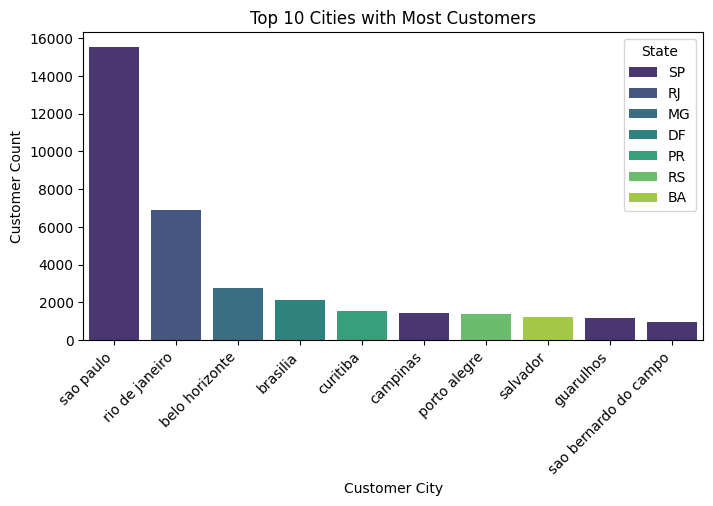

In [129]:
# Kode ini digunakan untuk membuat grafik batang (barplot) menggunakan Seaborn.
# Kode ini menampilkan 10 kota dengan jumlah pelanggan terbanyak berdasarkan top_ten_cities.

#Mengatur ukuran gambar plot menjadi 8 x 4.
plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_ten_cities,
    x='customer_city',        # Sumbu X menunjukkan nama kota
    y='customer_count',       # Sumbu Y menunjukkan jumlah pelanggan di kota tersebut
    hue='customer_state',     # Pemberian warna yang berbeda untuk setiap bar namun dibedakan berdasarkan perbedaan state
    palette='viridis')        # Menggunakan skema warna Viridis.

plt.xticks(rotation=45, ha='right')             # Memutar label sumbu X sebesar 45 derajat agar lebih mudah dibaca (nama kota).
plt.xlabel('Customer City')                     # Memberikan label sumbu X sebagai "Customer City".
plt.ylabel('Customer Count')                    # Memberikan label sumbu Y sebagai "Customer Count".
plt.title('Top 10 Cities with Most Customers')  # Menambahkan judul grafik
plt.legend(title='State')                       # Menampilkan legenda dengan label "State" (negara bagian/provinsi).

# Menampilkan grafik.
plt.show()

### Pertanyaan 2: <br>Bagaimana tingkat kepuasan pelanggan E-Commerce berdasarkan 10 nilai rating tertinggi pada pembelian tiap jenis barang yang dilakukan?

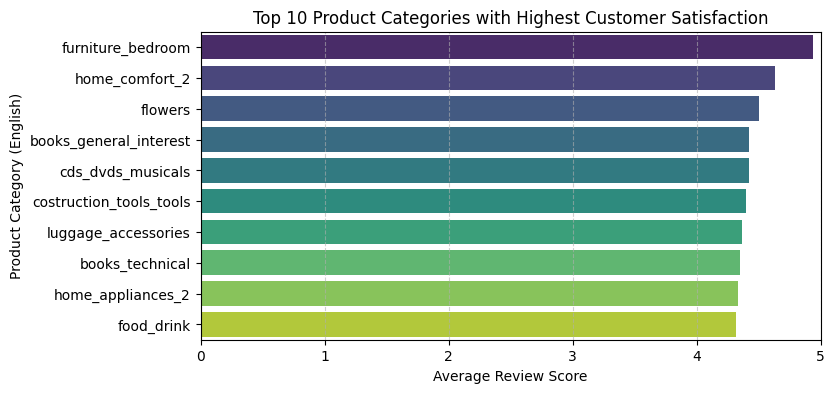

In [130]:
# Mengambil 10 kategori produk dengan rata-rata skor review tertinggi dari category_satisfaction
top_10_satisfaction = category_satisfaction.nlargest(10, 'review_score')

# Visualisasi data
plt.figure(figsize=(8, 4))  #Mengatur ukuran gambar agar tampilan visualisasi lebih jelas dan tidak terlalu padat.
sns.barplot(
    data=top_10_satisfaction,             # Menggunakan dataset yang telah difilter sebelumnya.
    x='review_score',                     # Sumbu X pada grafik Bar untuk menunjukkan rata-rata skor review.
    y='product_category_name_english',    # Sumbu Y menunjukkan nama kategori produk dalam bahasa Inggris.
    hue='product_category_name_english',  # Warna batang disesuaikan dengan nama kategori produk.
    palette='viridis',                    # Menggunakan skema warna "viridis" agar lebih menarik
    legend=False                          # Menghilangkan legenda karena warna batang sudah menunjukkan kategori produk.
)

# Tambahkan label dan judul
plt.xlabel("Average Review Score")                                          # Label untuk sumbu X (skor rata-rata review).
plt.ylabel("Product Category (English)")                                    # Label untuk sumbu Y (kategori produk dalam bahasa Inggris).
plt.title("Top 10 Product Categories with Highest Customer Satisfaction")   # Judul grafik yang menjelaskan isi visualisasi.
plt.xlim(0, 5)                                                              # Membatasi sumbu X dalam rentang 3 - 5 untuk fokus hanya pada nilai rating tinggi.
plt.grid(axis='x', linestyle='--', alpha=0.6)                               # Menambahkan garis bantu (grid) pada sumbu X agar lebih mudah dibaca.
plt.show()                                                                  # Menampilkan grafik di layar.

### Pertanyaan 3: <br>Metode Pembayaran apa yang lebih banyak digunakan oleh para pelanggan E-Commerce pada saat memesan barang?

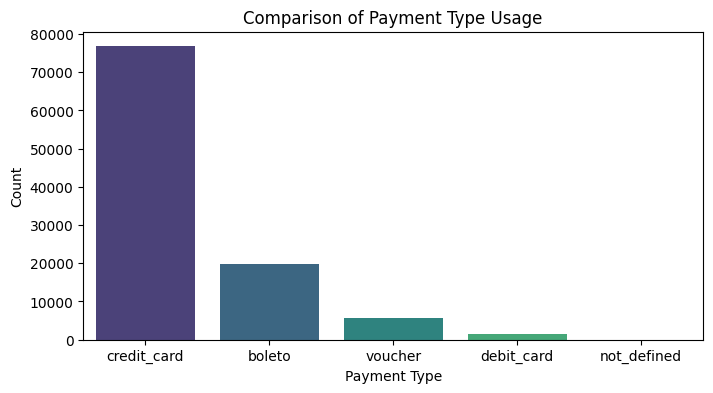

In [131]:
# Menghitung jumlah pemesanan untuk setiap metode pembayaran. Reset index digunakan untuk mengubah hasil menjadi DataFrame dengan indeks baru.
payment_counts = payments_df['payment_type'].value_counts().reset_index()

# Mengubah nama kolom menjadi payment_type dan count agar lebih mudah dipahami.
payment_counts.columns = ['payment_type', 'count']

# Membuat plot dengan hue
plt.figure(figsize=(8, 4))  # Membuat figure dengan ukuran 8x4
sns.barplot(                # Membuat grafik batang.
    data=payment_counts,    # Argumen dalam fungsi sns.barplot() yang menentukan bahwa data yang digunakan untuk membuat grafik berasal dari DataFrame payment_counts.
    x="payment_type",       # Sumbu X berisi jenis metode pembayaran.
    y="count",              # Sumbu Y berisi jumlah pesanan per metode pembayaran.
    hue="payment_type",     # Memberikan warna berbeda untuk setiap jenis pembayaran.
    palette="viridis",      # Menggunakan palet warna "viridis".
    legend=False            # Menonaktifkan legenda agar tidak berlebihan.
  )

# Menambahkan label & Judul Grafik
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Comparison of Payment Type Usage")

# Menampilkan Grafik
plt.show()

**Insight:**
- Penggunaan kartu kredit mendominasi sebagai metode pembayaran utama dengan jumlah pesanan tertinggi, jauh melebihi metode lainnya. Boleto, sebagai metode pembayaran kedua terbanyak.
- Kategori furniture_bedroom mendapatkan skor review tertinggi, menunjukkan bahwa pelanggan sangat puas dengan produk-produk dalam kategori ini.
- Penggunaan kartu kredit mendominasi sebagai metode pembayaran utama dengan jumlah pesanan tertinggi, jauh melebihi metode lainnya.
- Kota São Paulo memiliki jumlah pelanggan tertinggi dengan selisih yang sangat signifikan dibanding kota lainnya, yang menunjukkan bahwa kota ini adalah pasar utama untuk platform e-commerce yang dianalisis.

## Analisis Lanjutan (Opsional)

## Conclusion

- **Pertanyaan 1:**
<br>*Kesimpulan:*
<br>São Paulo dan Rio de Janeiro memiliki jumlah pelanggan paling banyak dibandingkan kota-kota lain. Kota-kota besar lainnya seperti Belo Horizonte dan Brasília juga memiliki jumlah pelanggan yang cukup signifikan.
<br>*Insights:*
<br>São Paulo sebagai pusat pelanggan terbesar menunjukkan potensi besar untuk ekspansi bisnis dan pemasaran di kota ini.
Rio de Janeiro sebagai pasar besar kedua menegaskan bahwa strategi bisnis harus tetap berfokus pada dua kota utama ini.
Keberagaman geografis dari daftar ini menunjukkan bahwa bisnis memiliki jangkauan yang luas, mencakup berbagai negara bagian seperti SP, RJ, MG, DF, PR, RS, dan BA.
<br>*Strategi bisnis:*
<br>Perusahaan dapat mempertimbangkan lebih banyak kampanye iklan berbasis lokasi, promosi, dan pengoptimalan layanan pengiriman di kota-kota dengan pelanggan terbanyak.

- **Pertanyaan 2:**
<br>*Kesimpulan:*
<br>Kategori furniture_bedroom, home_comfort_2, dan flowers memiliki rating kepuasan pelanggan tertinggi, dengan rata-rata mendekati 5. Produk dari kategori ini sangat memenuhi harapan pelanggan.
<br>*Insights:*
<br>Kategori dengan skor tinggi (furniture, home comfort, flowers) menunjukkan bahwa pelanggan puas dengan kualitas dan layanan produk-produk ini. Ini bisa disebabkan oleh kualitas produk yang baik, deskripsi produk yang akurat, atau layanan pengiriman yang andal.
Buku dan media (books_general_interest, cds_dvds_musicals) juga mendapat rating tinggi, mungkin karena kualitas isi produk dan keakuratan informasi di toko online.
<br>*Strategi bisnis:*
<br>Perusahaan dapat mempertahankan standar tinggi dalam kategori produk dengan rating terbaik dan meningkatkan layanan pada kategori lain agar mendapat tingkat kepuasan yang sama.

- **Pertanyaan 3:**
<br>*Kesimpulan:*
<br>Mayoritas pelanggan menggunakan kartu kredit sebagai metode pembayaran utama, dengan jumlah yang jauh lebih tinggi dibandingkan metode lain seperti boleto, voucher, dan kartu debit. Sementara itu, kategori not_defined memiliki jumlah transaksi yang sangat sedikit.
<br>*Insights:*
<br>Kartu kredit adalah metode pembayaran paling populer, kemungkinan karena kenyamanan dan fitur cicilan yang disediakan.
Boleto sebagai metode pembayaran kedua mungkin lebih sering digunakan oleh pelanggan yang tidak memiliki kartu kredit.
Voucher dan kartu debit kurang populer, menunjukkan bahwa banyak pelanggan lebih memilih kredit dibanding debit untuk berbelanja online.
<br>*Strategi bisnis:*
<br>Merchant dapat mempertimbangkan untuk menawarkan lebih banyak promo atau cashback bagi pengguna metode pembayaran yang kurang populer guna meningkatkan diversifikasi transaksi.